In [ ]:
%%bash
pip3 install ipyleaflet
jupyter nbextension enable --py --sys-prefix ipyleaflet

In [2]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(center=[55.75222, 37.61556], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

---------
-------
-----

Данные из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [3]:
data = pd.read_csv('NY taxi_train.csv')
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [4]:
data.shape

(1458644, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


dropoff_datetime был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, удалим ее:

In [6]:
data = data.drop(columns=["dropoff_datetime"])
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
data.shape

(1458644, 10)

В pickup_datetime записаны дата и время начала поездки. Чтобы с ней было удобно работать, преобразуем даты в datetime-объекты:

In [8]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
print(type(data['pickup_datetime']))
print(type(data['pickup_datetime'][0]))
data['pickup_datetime'][0]

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2016-03-14 17:24:55')

In [9]:
data["trip_duration"].value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
399      1573
418      1570
417      1568
388      1567
344      1561
327      1560
449      1560
334      1556
369      1556
378      1550
422      1550
352      1549
438      1547
424      1547
357      1542
403      1540
362      1540
376      1539
353      1539
354      1538
386      1538
332      1538
398      1536
448      1536
375      1533
         ... 
85932       1
83236       1
5390        1
13184       1
6896        1
83235       1
29576       1
4361        1
5872        1
6020        1
7044        1
4999        1
85933       1
6753        1
85304       1
7440        1
6416        1
81205       1
7441        1
86328       1
82860       1
6418        1
4370        1
6022        1
5873        1
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

В колонке trip_duration записано целевое значение, которое мы хотим предсказывать. 
<br>Разобьем выборку на обучающую и тестовую в отношении 7:3:

In [10]:
from sklearn.model_selection import train_test_split

y = data["trip_duration"]
X = data.drop(columns=["trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Посмотрим на распределение таргета в обучающей выборке. Для этого нарисуем его гистограмму:

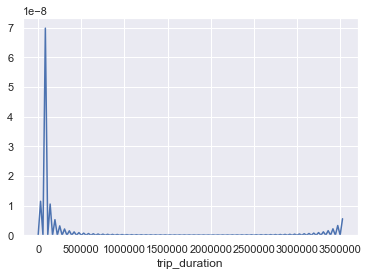

In [11]:
sns.distplot(y_train, hist=False)

Для таких графиков идеологически правильнее bar chart'ы.
Потому что вот эти вот скачки.

In [12]:
# sns.barplot(x='id', y='trip_duration', data=data)

В соревновании в качестве метрики качества использовалось RMSLE:$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

In [13]:
from sklearn.metrics import make_scorer

def rmsle(y_true, y_pred):
    error = (np.log(y_true + 1) - np.log(y_pred)) ** 2
    return np.sqrt(np.mean(error))

rmsle_scorer = make_scorer(
    rmsle,
    greater_is_better=False
)

В sklearn каждая из метрик оптимизирует среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее логарифм. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

У логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавим к нашим выборкам колонки log_trip_duration и нарисуем гистограмму модифицированного таргета по обучающей выборке:

In [14]:
log_trip_duration = []

for i in range(len(data)):
    elem = np.log1p(data['trip_duration'][i])
    log_trip_duration.append(elem)

data['log_trip_duration'] = log_trip_duration
data.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,6.095825
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341,5.834811
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,7.347300
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255,5.545177
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,7.111512


In [15]:
y_log = data["log_trip_duration"]
X_log = data.drop(columns=["log_trip_duration"])

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=10)

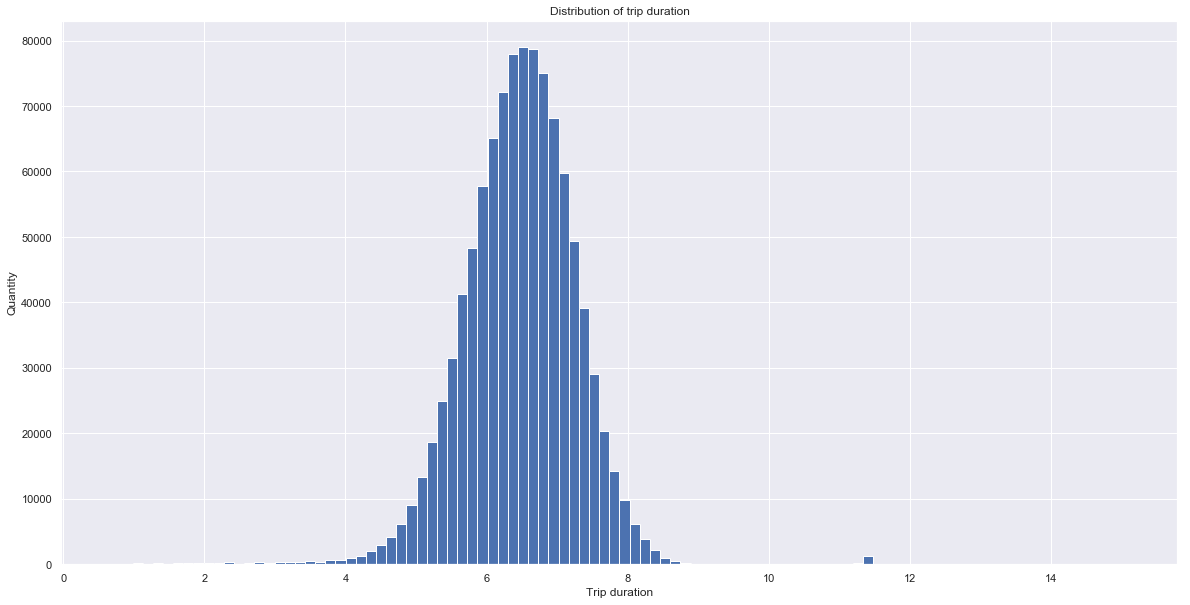

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of trip duration')
ax.set_ylabel('Quantity')
ax.set_xlabel('Trip duration')

ax.hist(y_train_log, bins=100)
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [17]:
best_constant = y_train_log.mean()
print("Test RMSLE with best constant = %.4f" % rmsle(y_test_log, best_constant))
print("Train RMSLE with best constant = %.4f" % rmsle(y_train_log, best_constant))

Test RMSLE with best constant = 0.1782
Train RMSLE with best constant = 0.1783


----
-----
----

Для начала посмотрим, сколько всего было поездок в каждый из дней. 
<br>Построим сначала график зависимости количества поездок от месяца:

In [18]:
i = 0

for d in data['pickup_datetime']:
    i+=1
    print(d, d.day, sep='    ')
    if (i == 10):
        break

2016-03-14 17:24:55    14
2016-06-12 00:43:35    12
2016-01-19 11:35:24    19
2016-04-06 19:32:31    6
2016-03-26 13:30:55    26
2016-01-30 22:01:40    30
2016-06-17 22:34:59    17
2016-05-21 07:54:58    21
2016-05-27 23:12:23    27
2016-03-10 21:45:01    10


*1st way:*

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)

data['pickup_datetime'].groupby(data['pickup_datetime'].dt.month).count().plot.bar()

*2nd way:*

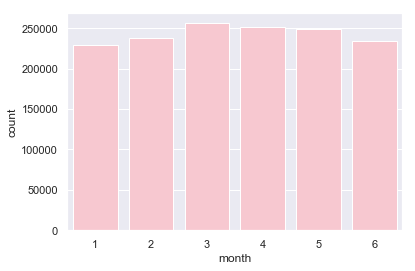

In [19]:
d = data['pickup_datetime']
df = pd.DataFrame(d)
df['month'] = pd.DatetimeIndex(df['pickup_datetime']).month

sns.countplot(x='month', data=df, color='Pink')

Построим теперь график зависимости количества поездок от дня в году:

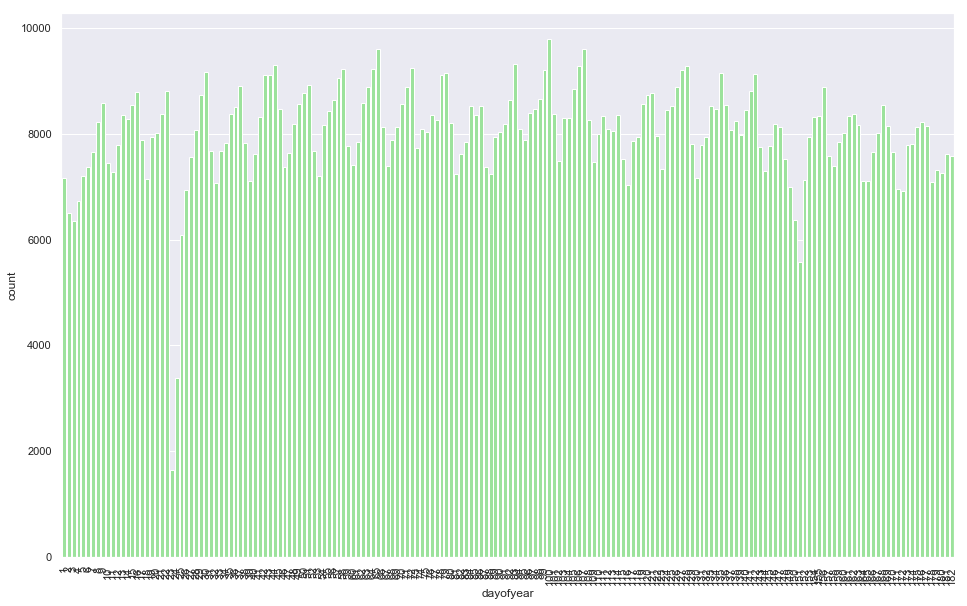

In [20]:
d = data['pickup_datetime']
df = pd.DataFrame(d)
df['dayofyear'] = pd.DatetimeIndex(df['pickup_datetime']).dayofyear

plot = sns.countplot(x='dayofyear', data=df, color='LightGreen')
plot.figure.set_size_inches(16, 10)
for item in plot.get_xticklabels():
    item.set_rotation(90)

Нарисуем графики зависимости количества поездок от дня недели и от часов в сутках:

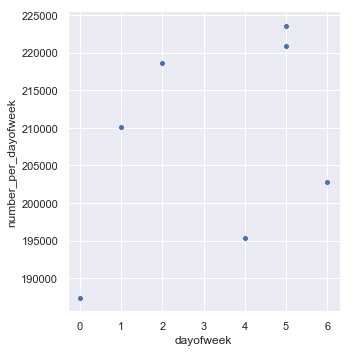

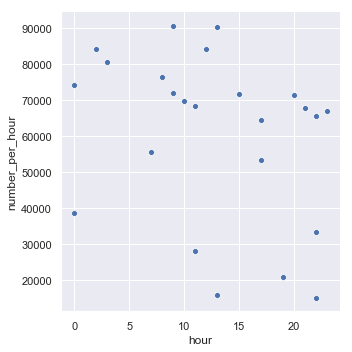

In [21]:
d = data['pickup_datetime']
df = pd.DataFrame(d)
df['dayofweek'] = pd.DatetimeIndex(df['pickup_datetime']).dayofweek
df['hour'] = pd.DatetimeIndex(df['pickup_datetime']).hour

df['number_per_dayofweek'] = df['dayofweek'].value_counts()
df['number_per_dayofweek'] = df['number_per_dayofweek'].dropna()
df['number_per_hour'] = df['hour'].value_counts()
df['number_per_hour'] = df['number_per_hour'].dropna()

plot1 = sns.relplot(x="dayofweek", y="number_per_dayofweek", data=df)
plot2 = sns.relplot(x="hour", y="number_per_hour", data=df)

Нарисуем на одном графике зависимости количества поездок от часа в сутках для разных месяцев 
<br>(разные кривые соответствуют разным месяцам):

In [22]:
import warnings

warnings.filterwarnings('ignore')

In [23]:
import calendar

X_train_log['weekday'] = X_train_log.apply(lambda row: row.pickup_datetime.weekday(), axis=1)
X_test_log['weekday'] = X_test_log.apply(lambda row: row.pickup_datetime.weekday(), axis=1)

In [24]:
X_train_log['hour'] =  X_train_log.apply(lambda row: row.pickup_datetime.hour, axis=1)
X_test_log['hour'] =  X_test_log.apply(lambda row: row.pickup_datetime.hour, axis=1)

In [25]:
raw_weekday_cnt = pd.DataFrame()
raw_weekday_cnt['weekday'] = X_train_log.weekday
raw_weekday_cnt['number_of_trips'] = 1

weekday_cnt = raw_weekday_cnt.groupby('weekday', as_index=False).agg({
                                    'number_of_trips': 'sum'
                                    })

weekday_cnt.sample()

,weekday,number_of_trips
4,4,156791


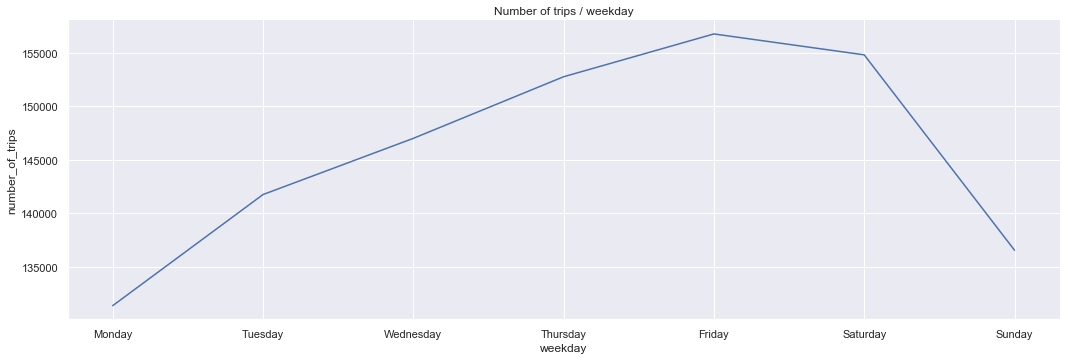

In [26]:
g = sns.relplot(data=weekday_cnt, x="weekday", y="number_of_trips", kind='line', aspect=3)
plt.title("Number of trips / weekday")
plt.xticks(np.arange(7), calendar.day_name[0:7])
plt.show()

Нарисуем на одном графике зависимости количества поездок от часа в сутках для разных дней недели 
<br>(разные кривые соответствуют разным неделям):

In [27]:
raw_hour_cnt = pd.DataFrame()
raw_hour_cnt['hour'] = X_train_log.hour
raw_hour_cnt['number_of_trips'] = 1

hour_cnt = raw_hour_cnt.groupby('hour', as_index=False).agg({
                                'number_of_trips': 'sum'
                                })

hour_cnt.sample()

,hour,number_of_trips
14,14,52091


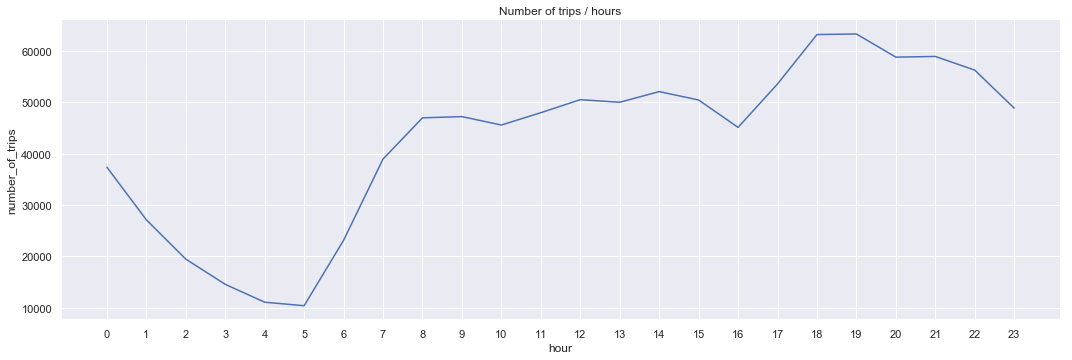

In [28]:
g = sns.relplot(data=hour_cnt, x="hour", y="number_of_trips", kind='line', aspect=3)
plt.title("Number of trips / hours")
plt.xticks(np.arange(24))
plt.show()

Нарисуем на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствуют разным месяцам):

In [29]:
X_train_log['month'] =  X_train_log.apply(lambda row: row.pickup_datetime.month, axis=1)
X_test_log['month'] =  X_test_log.apply(lambda row: row.pickup_datetime.month, axis=1)

In [30]:
raw_hour_month_cnt = pd.DataFrame()
raw_hour_month_cnt['hour'] = X_train_log.hour
raw_hour_month_cnt['month'] = X_train_log.apply(lambda row: calendar.month_name[row.month], axis=1)
raw_hour_month_cnt['number'] = 1

In [31]:
hour_month_cnt = raw_hour_month_cnt.groupby(['month', 'hour'], as_index=False).agg({
                                            'number': 'sum'
                                            })
hour_month_cnt.sample()

,month,hour,number
140,May,20,9960


Text(0.5, 1.0, 'Number of trips in diffenet months depends on time')

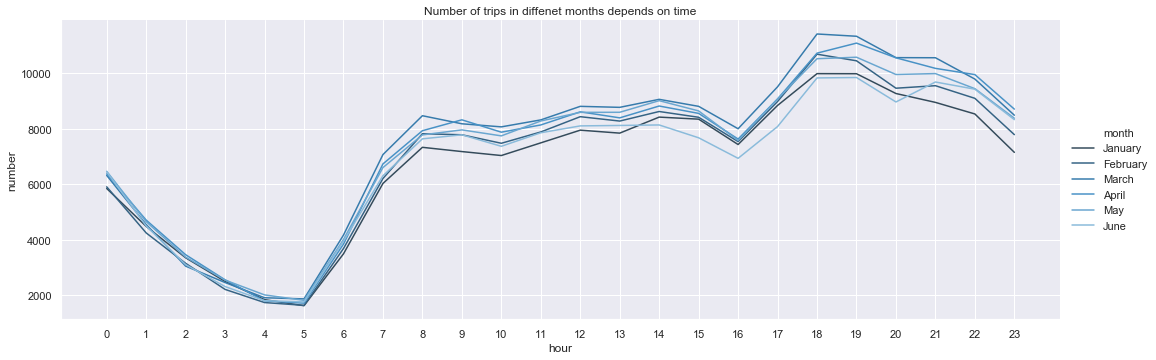

In [49]:
g = sns.relplot(
                data=hour_month_cnt, 
                x="hour", y="number", 
                kind='line', 
                hue="month",
                hue_order=calendar.month_name[1:7],
                aspect=3, 
                palette=sns.color_palette("Blues_d", n_colors=6)
                )

plt.xticks(np.arange(24))
plt.title("Number of trips in diffenet months depends on time")

Нарисуем на одном графике зависимости количества поездок от часа в сутках для разных дней недели:

In [33]:
raw_hour_weekday_cnt = pd.DataFrame()
raw_hour_weekday_cnt['hour'] = X_train_log.hour
raw_hour_weekday_cnt['weekday'] = X_train_log.apply(lambda x: calendar.day_name[x.weekday], axis=1)
raw_hour_weekday_cnt['number'] = 1

In [34]:
hour_weekday_cnt = raw_hour_weekday_cnt.groupby(['weekday', 'hour'], as_index=False).agg({
                                                'number': 'sum'
                                                })
hour_weekday_cnt.sample()

,weekday,hour,number
82,Sunday,10,6076


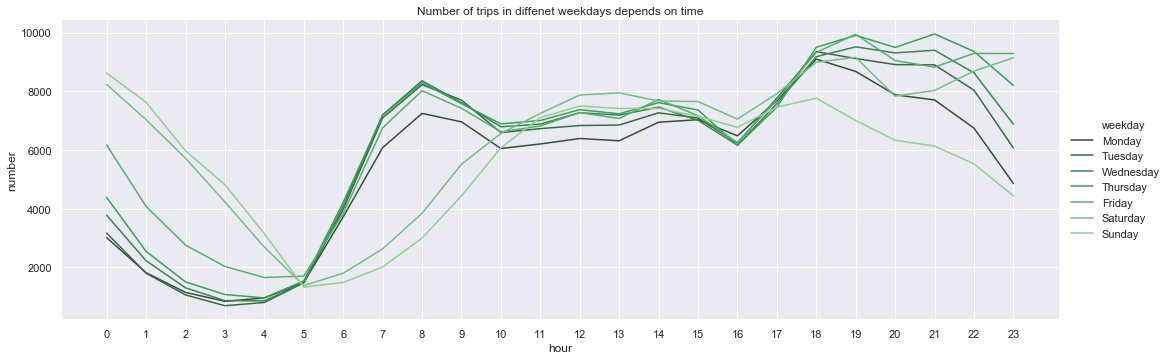

In [35]:
g = sns.relplot(
                data=hour_weekday_cnt, 
                x="hour", y="number", 
                kind='line', 
                hue="weekday",
                hue_order=calendar.day_name,
                aspect=3, 
                palette=sns.color_palette("Greens_d", n_colors=7)
                )

plt.title("Number of trips in diffenet weekdays depends on time")
plt.xticks(np.arange(24))

По обучающей выборке нарисуем график зависимости среднего логарифма времени поездки от дня недели:

In [36]:
target_weekday = pd.DataFrame()
target_weekday['weekday'] = X_train_log.weekday
target_weekday['log_trip_duration'] = y_train_log
grouped_target_weekday = target_weekday.groupby('weekday').agg({
                                                                'log_trip_duration': 'mean'
                                                                })

In [37]:
grouped_target_weekday.reset_index(inplace=True)
grouped_target_weekday.sample()

,weekday,log_trip_duration
5,5,6.418129


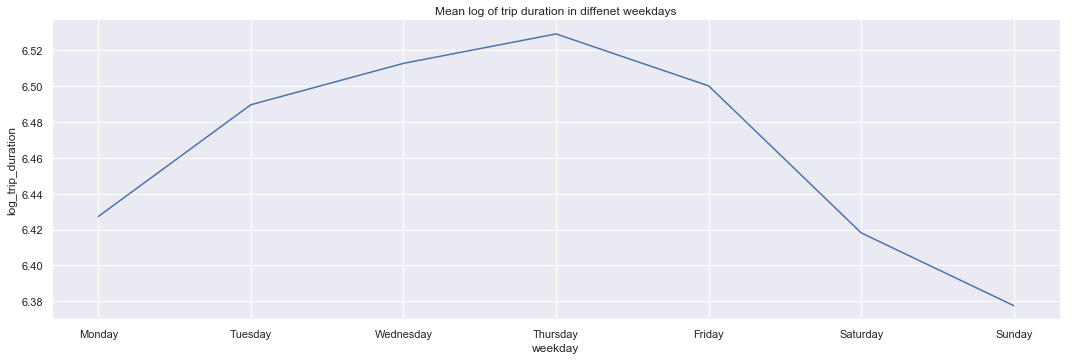

In [38]:
g = sns.relplot(
                data=grouped_target_weekday, 
                x="weekday", y="log_trip_duration", 
                kind='line',
                aspect=3
                )

plt.title("Mean log of trip duration in diffenet weekdays")
plt.xticks(np.arange(7), calendar.day_name[0:7])
plt.show()

По обучающей выборке нарисуем график зависимости среднего логарифма времени поездки от часа в сутках:

In [39]:
target_hour = pd.DataFrame()
target_hour['hour'] = X_train_log.hour
target_hour['log_trip_duration'] = y_train_log
grouped_target_hour = target_hour.groupby('hour').agg({
                                                        'log_trip_duration': 'mean'
                                                      })

grouped_target_hour.reset_index(inplace=True)
grouped_target_hour.sample()

,hour,log_trip_duration
5,5,6.233332


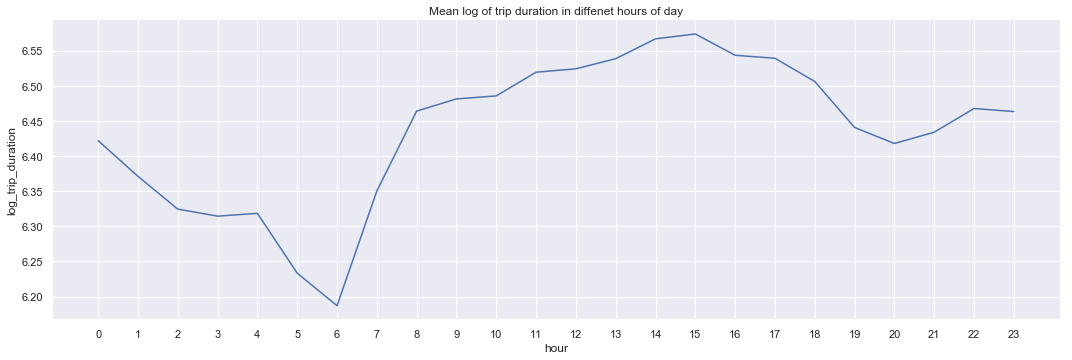

In [40]:
g = sns.relplot(
                data=grouped_target_hour, 
                x="hour", y="log_trip_duration", 
                kind='line',
                aspect=3
                )

plt.title("Mean log of trip duration in diffenet hours of day")
plt.xticks(np.arange(24))
plt.show()

По обучающей выборке нарисуем график зависимости среднего логарифма времени поездки от дня в году:

In [41]:
X_train_log['year_day'] = X_train_log.apply(lambda row: row.pickup_datetime.timetuple().tm_yday, axis=1)
X_test_log['year_day'] = X_test_log.apply(lambda row: row.pickup_datetime.timetuple().tm_yday, axis=1)

year_day_names = X_train_log.apply(
                            lambda row: row.pickup_datetime.strftime("%Y-%m-%d"), axis=1
                              ).drop_duplicates() \
                                .sort_values() \
                                .reset_index()[0]

In [42]:
target_day = pd.DataFrame()
target_day['day'] = X_train_log.year_day
target_day['log_trip_duration'] = y_train_log
grouped_target_day = target_day.groupby('day').agg({
                                                    'log_trip_duration': 'mean'
                                                    })

grouped_target_day.reset_index(inplace=True)
grouped_target_day.sample()

,day,log_trip_duration
114,115,6.381713


Text(0.5, 1.0, 'Mean log of trip duration in diffenet days')

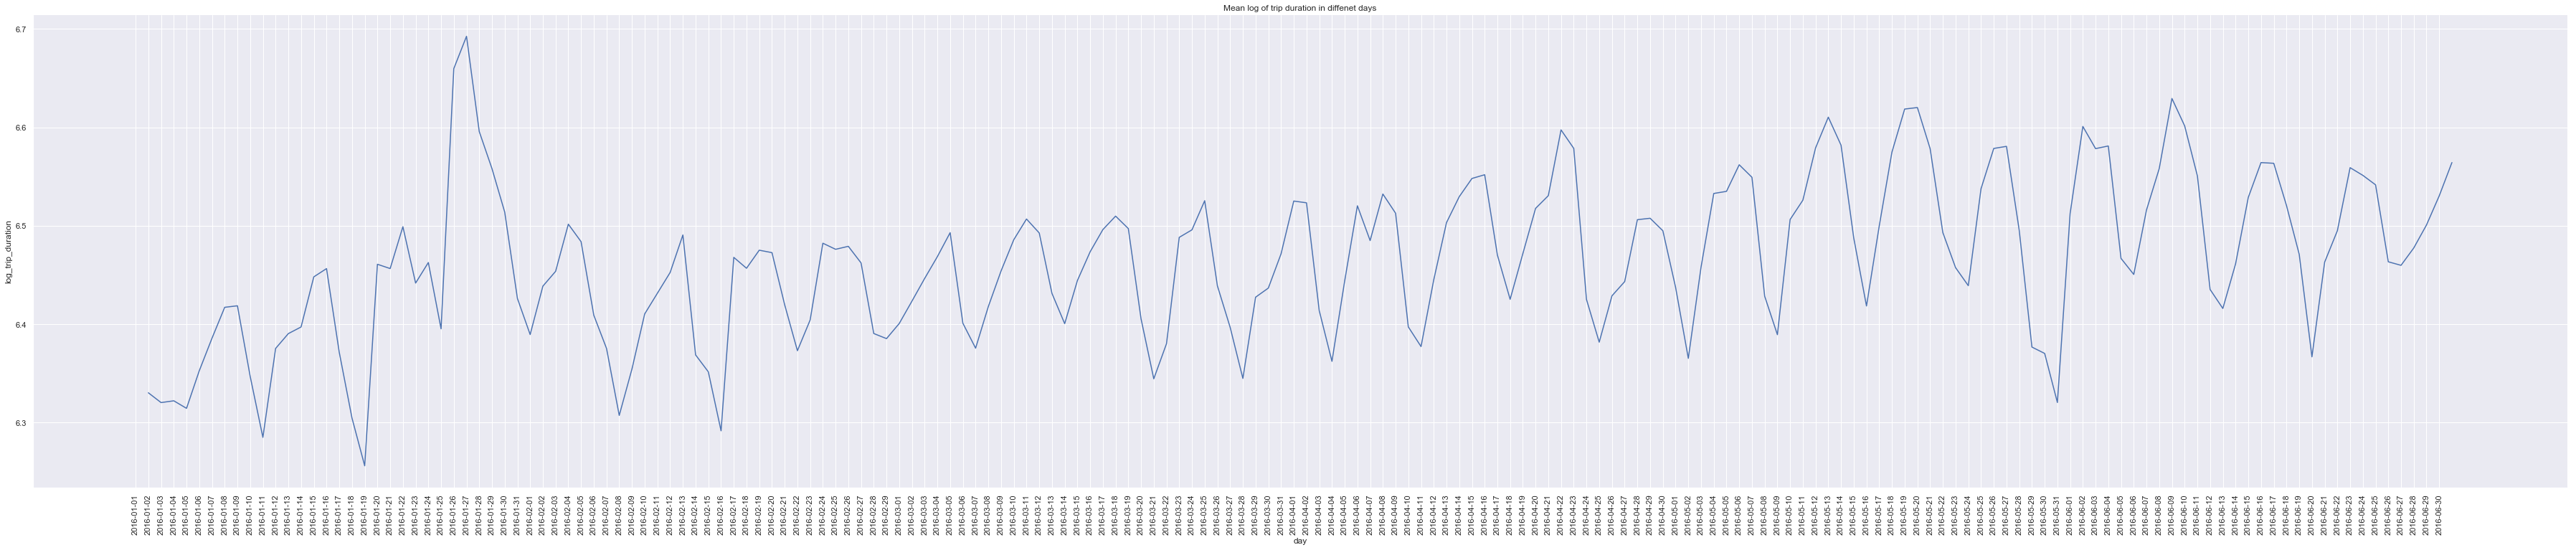

In [43]:
g = sns.relplot(
                data=grouped_target_day, 
                x="day", y="log_trip_duration", 
                kind='line',
                aspect=5,
                height=10
                )

plt.xticks(np.arange(182), year_day_names, rotation=90)
plt.title("Mean log of trip duration in diffenet days")

Добавим следующий признак на основе pickup_datetime:
    - Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)

In [44]:
X_train_log['blizzard'] = ((22 <= X_train_log.loc[:,'year_day']) & (X_train_log.loc[:,'year_day'] <= 24)).astype('int64')
X_test_log['blizzard'] =  ((22 <= X_test_log.loc[:,'year_day']) & (X_test_log.loc[:,'year_day'] <= 24)).astype('int64')

X_train_log['summer_anomaly'] =  ((149 <= X_train_log.loc[:,'year_day']) & (X_train_log.loc[:,'year_day'] <= 150)).astype('int64')
X_test_log['summer_anomaly'] =  ((149 <= X_test_log.loc[:,'year_day']) & (X_test_log.loc[:,'year_day'] <= 150)).astype('int64')

In [45]:
X_train_log.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour,month,year_day,blizzard,summer_anomaly
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,6,0,3,87,0,0
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,4,20,3,78,0,0
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,4,18,4,106,0,0
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,3,14,3,84,0,0
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,3,13,4,119,0,0


In [46]:
X_test_log.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour,month,year_day,blizzard,summer_anomaly
112342,id2631171,2,2016-01-23 00:09:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660,5,0,1,23,1,0
840803,id2892416,1,2016-02-10 19:24:14,3,-73.963203,40.777924,-74.004059,40.747654,N,1833,2,19,2,41,0,0
184538,id3095142,2,2016-05-12 06:39:26,1,-73.987595,40.719822,-74.010994,40.716148,N,490,3,6,5,133,0,0
512001,id3803823,2,2016-01-21 08:31:03,1,-73.969055,40.763618,-73.974129,40.778679,N,767,3,8,1,21,0,0
776055,id3155730,2,2016-01-02 13:12:33,2,-73.950165,40.775635,-73.944534,40.779636,N,199,5,13,1,2,0,0


Обучим Ridge-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью OneHotEncoder. 
<br>Численные признаки отмасштабируем с помощью StandardScaler. Используем только выделенные нами признаки (они последние).

In [47]:
features = ['year_day', 'hour', 'weekday', 'month', 'blizzard', 'summer_anomaly']

categorical_features = ['hour', 'weekday', 'month', 'blizzard', 'summer_anomaly']
numeric_features = ['year_day']

In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


column_transformer = ColumnTransformer([
                                        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
                                        ('scaling', StandardScaler(), numeric_features)
                                       ])

pipeline = Pipeline(steps=[
                            ('ohe_and_scaling', column_transformer),
                            ('regression', Ridge())
                          ])

model = pipeline.fit(X_train_log[features], y_train_log)
y_pred = model.predict(X_train_log[features])
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))
y_pred = model.predict(X_test_log[features])
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1779
Test RMSLE = 0.1777


На константе было:
<br>Train RMSLE with best constant = 0.1783
<br>Test RMSLE with best constant = 0.1782

Немногим лучше:/

----------------------
---------------
----------